# Bank Marketing Predictive Model

>- **Data Collection: Gather customer data.**
>- **Data Preprocessing: Clean and prepare data.**
>- **Feature Engineering: Select relevant attributes.**
>- **Model Selection: Build a classification model.**
>- **Evaluation: Assess model performance.**
>- **Business Impact: Improve marketing campaign effectiveness and customer engagement.**
>- **Benefits: Targeted marketing, cost reduction, increased subscription rates.**

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset:

In [2]:
df=pd.read_csv(r"C:\Users\jhonn\Downloads\sinsagar program\bank-additional-full.csv",sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Data Preprocessing:

In [7]:
df.duplicated().sum()

12

In [8]:
df=df.drop_duplicates()

In [9]:
df=df.dropna()

In [10]:
df.shape

(41176, 21)

In [11]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

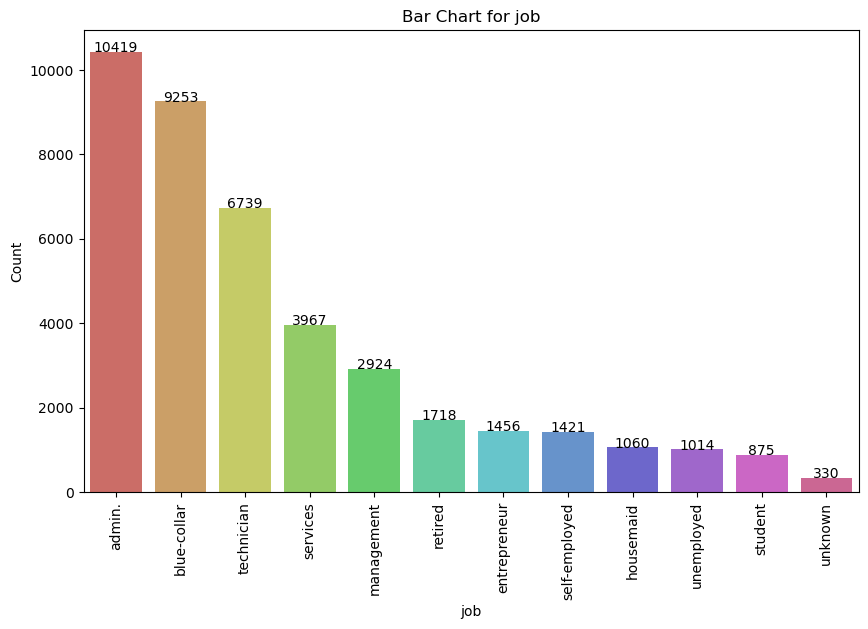

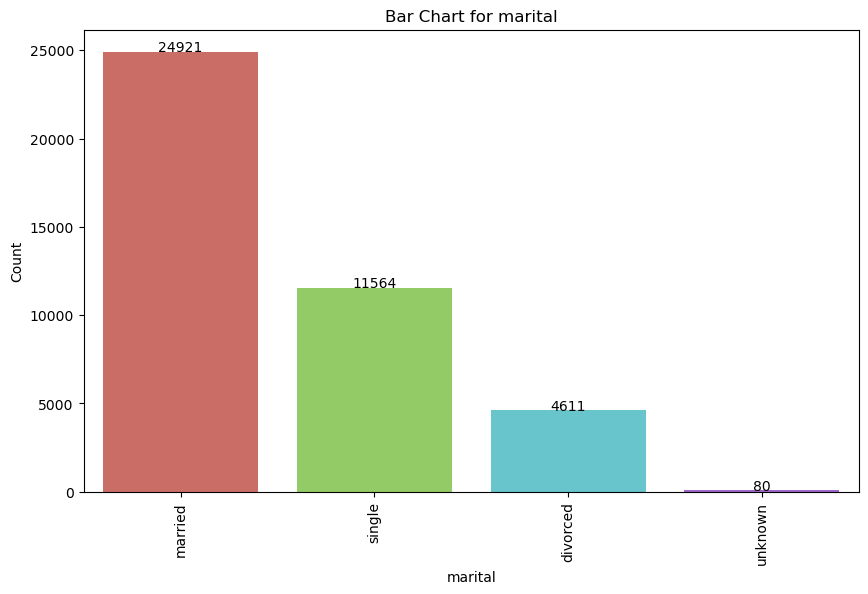

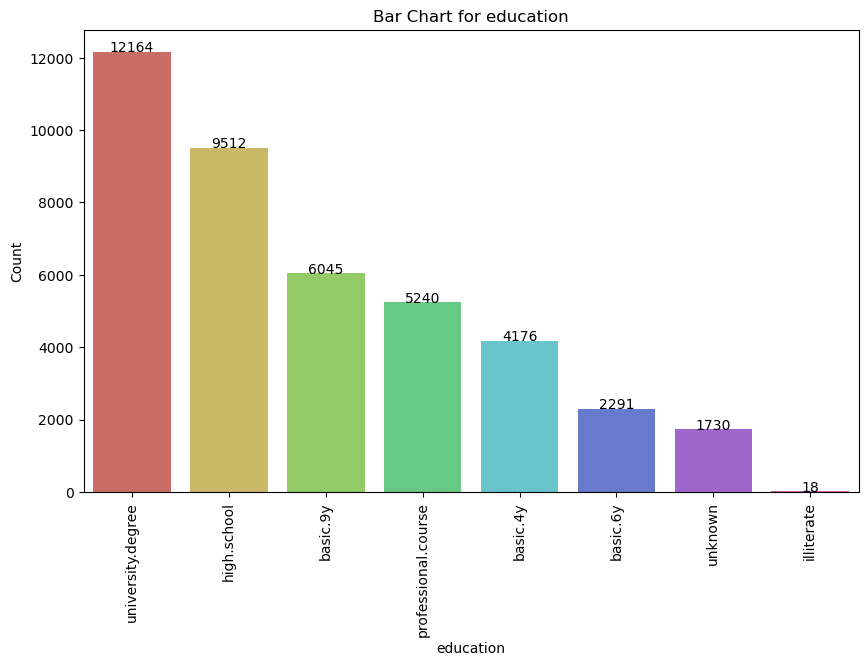

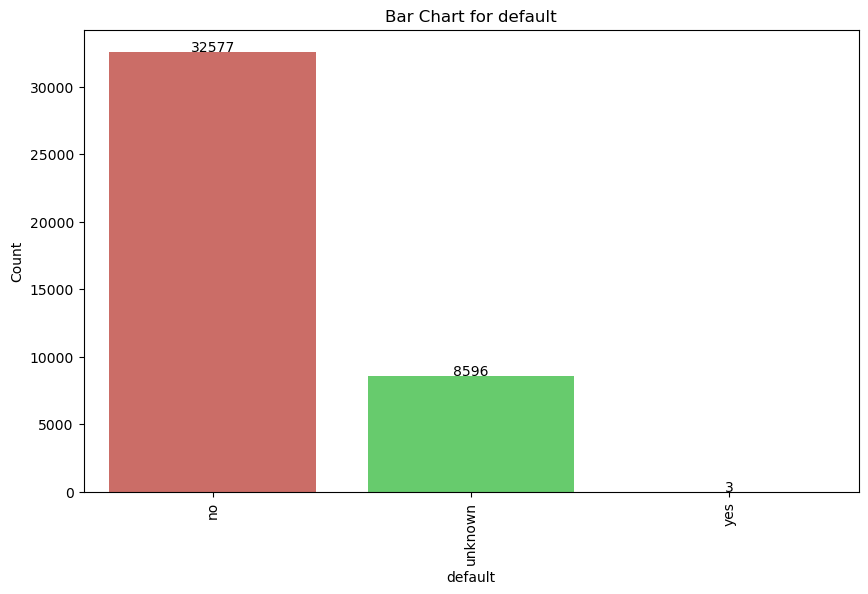

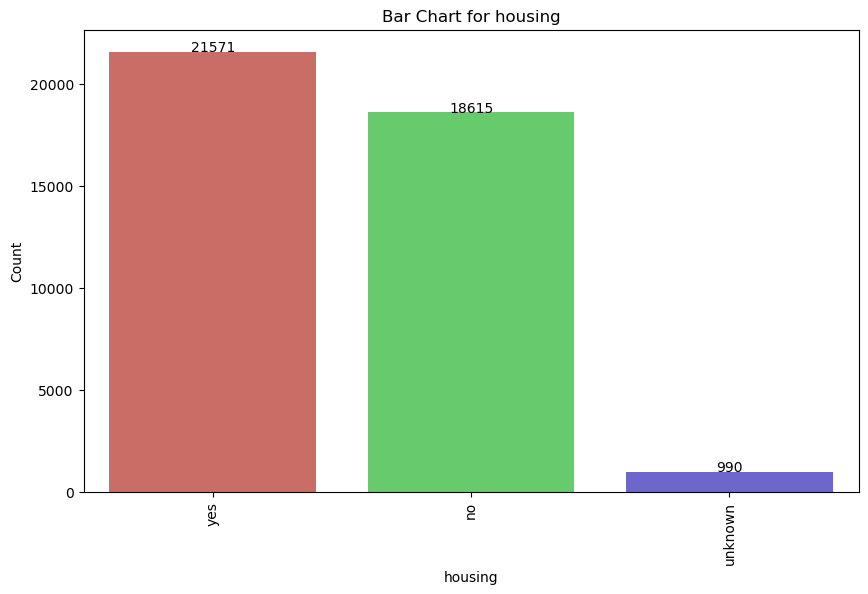

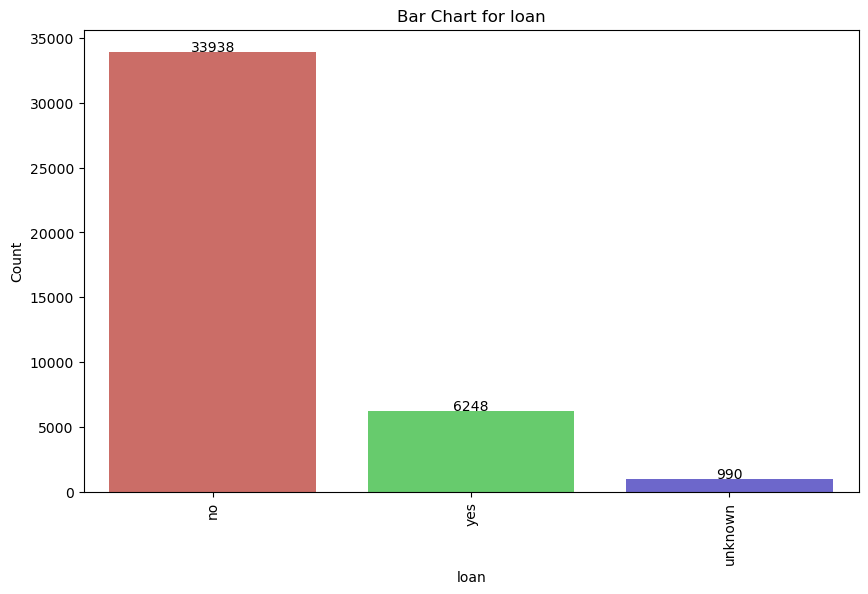

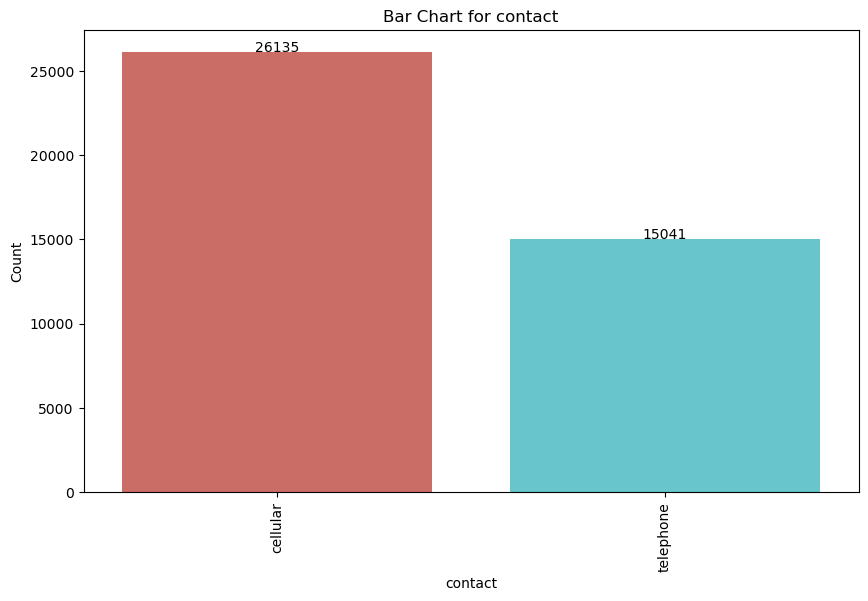

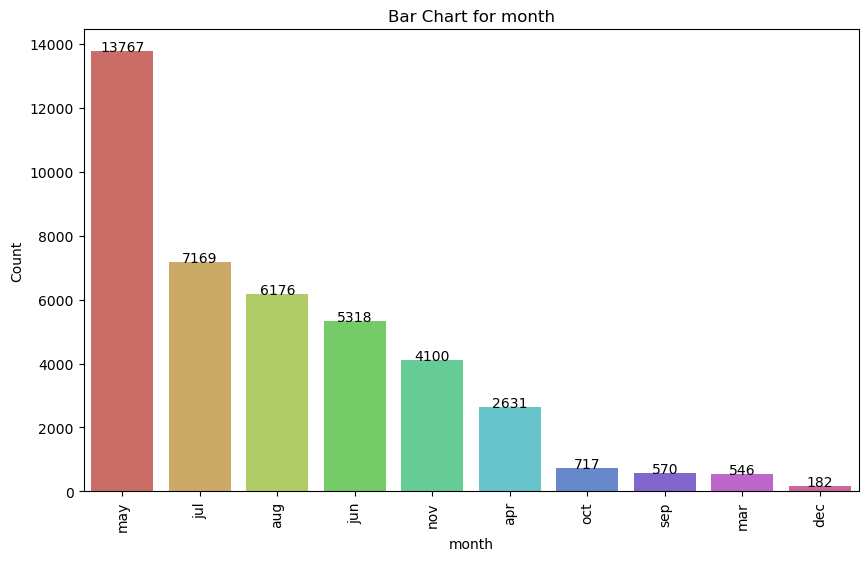

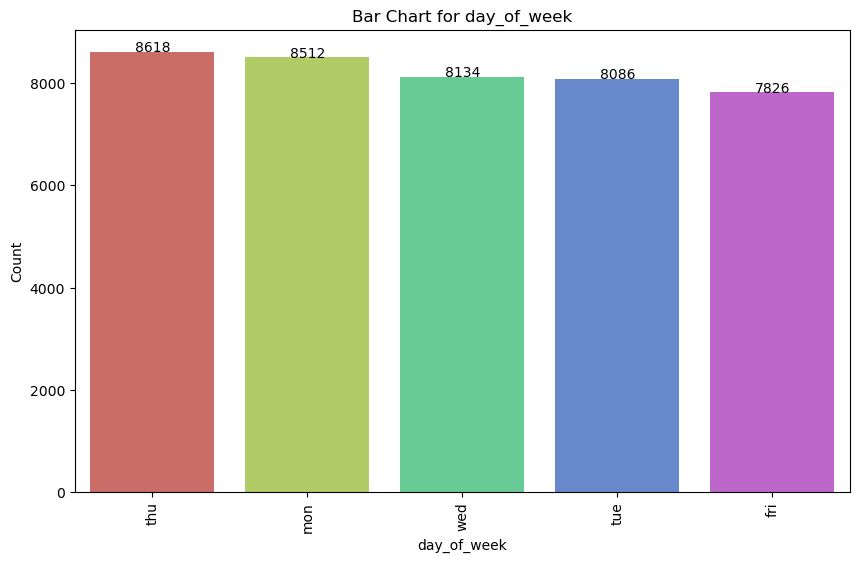

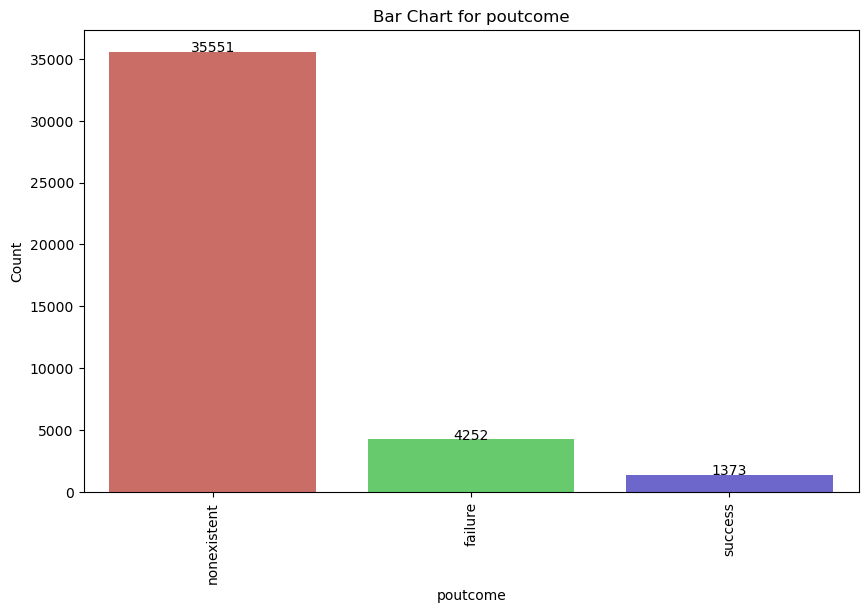

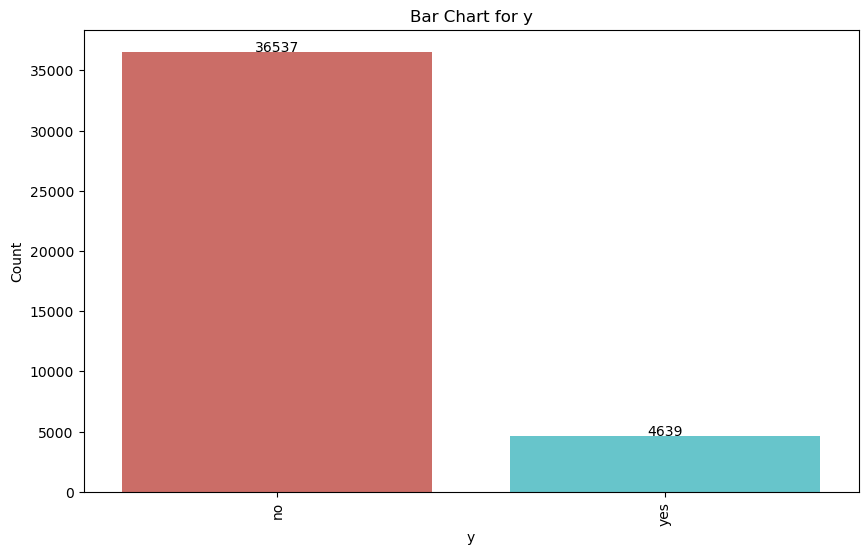

In [12]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
for i in object_columns:
    sorted_order = df[i].value_counts().index 

    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=i, palette='hls', order=sorted_order)
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Bar Chart for {i}')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

    plt.show()
    

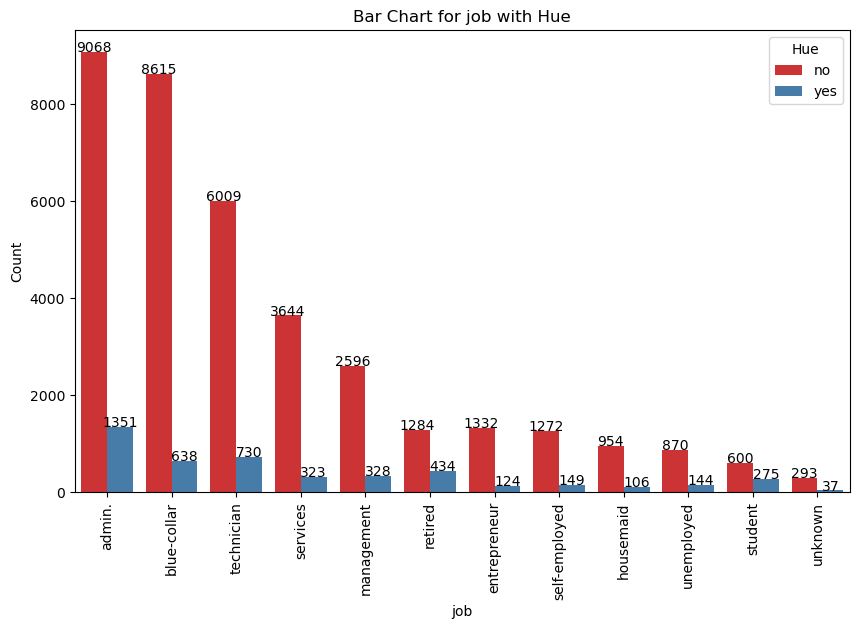

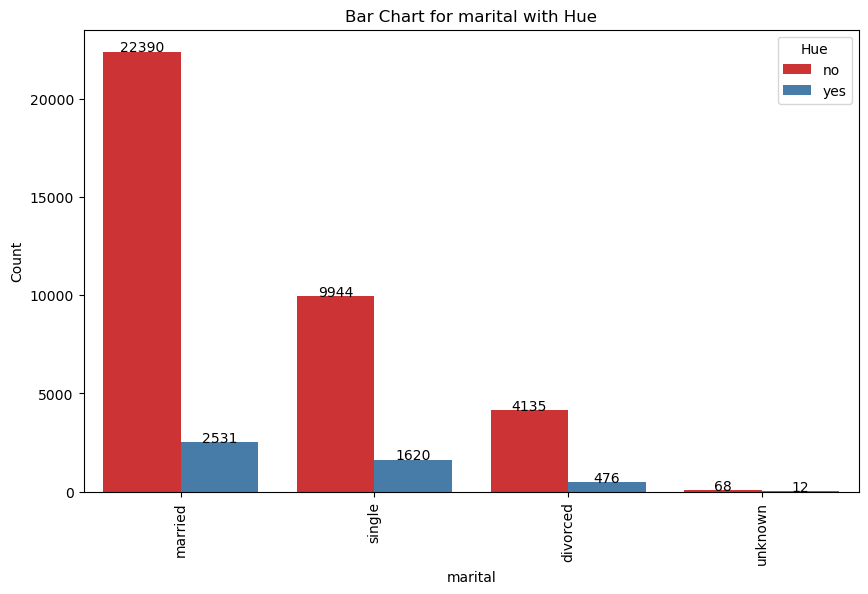

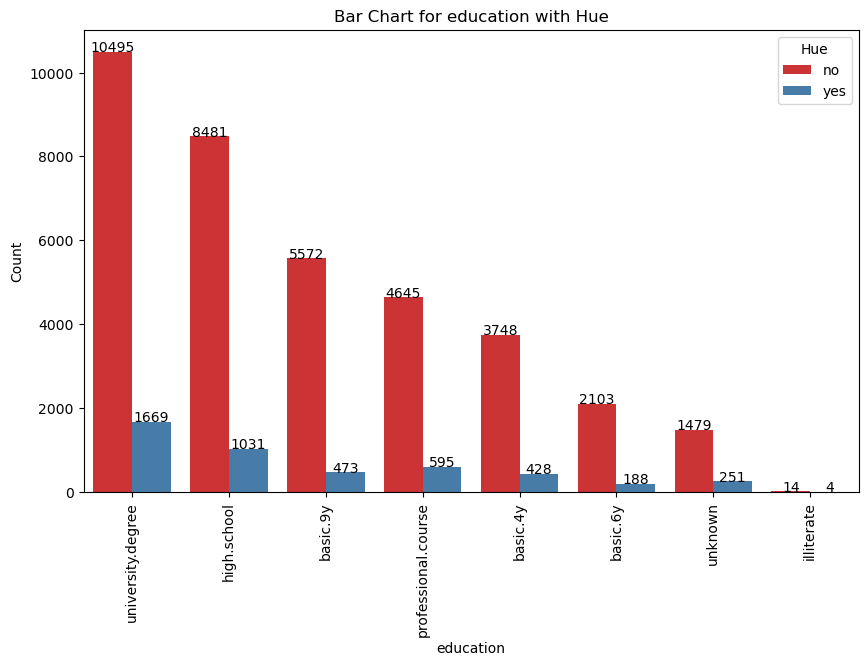

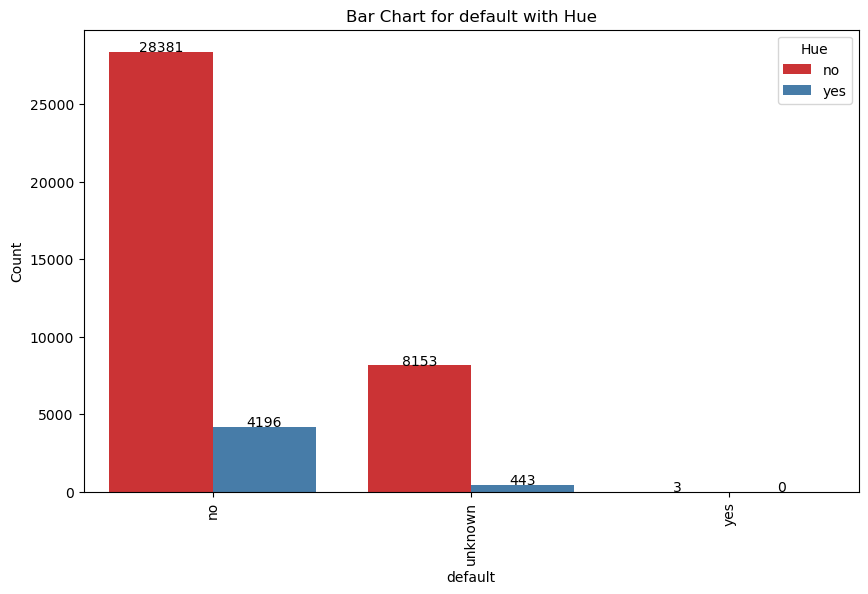

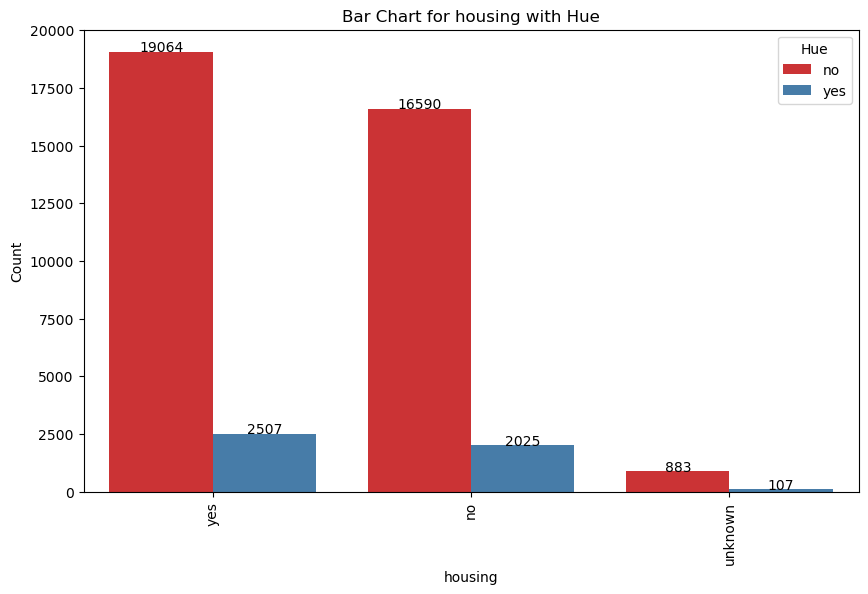

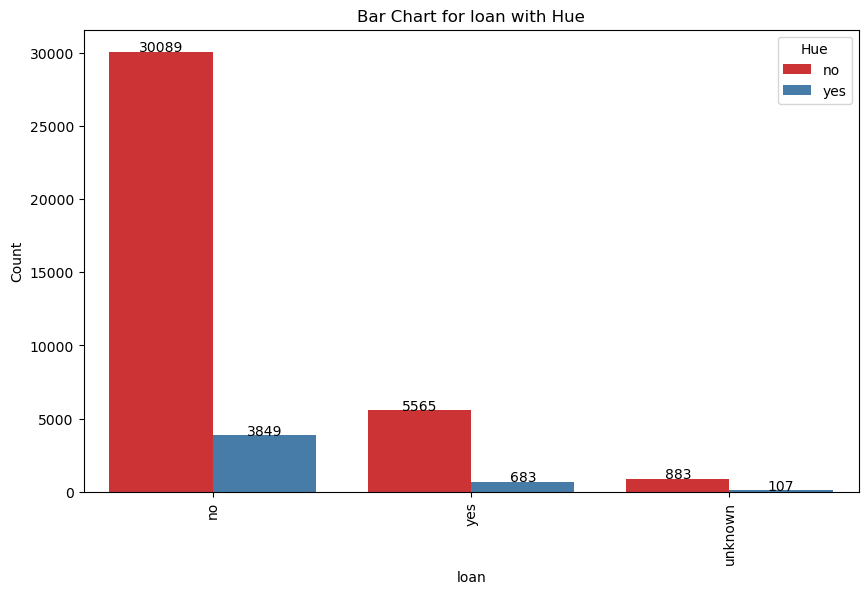

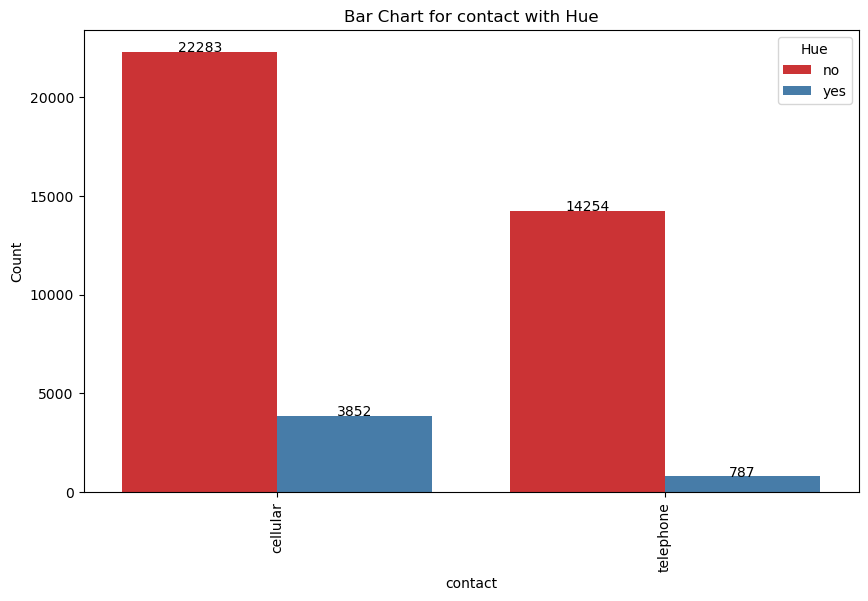

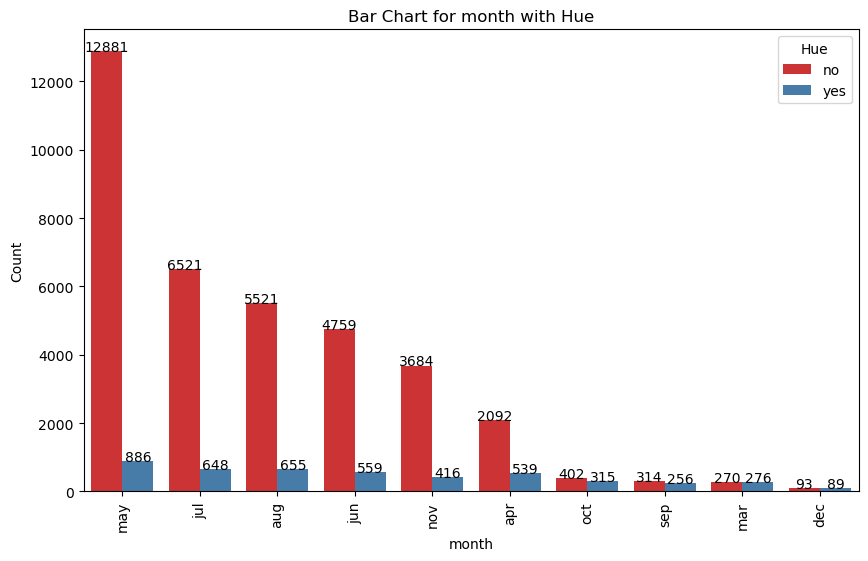

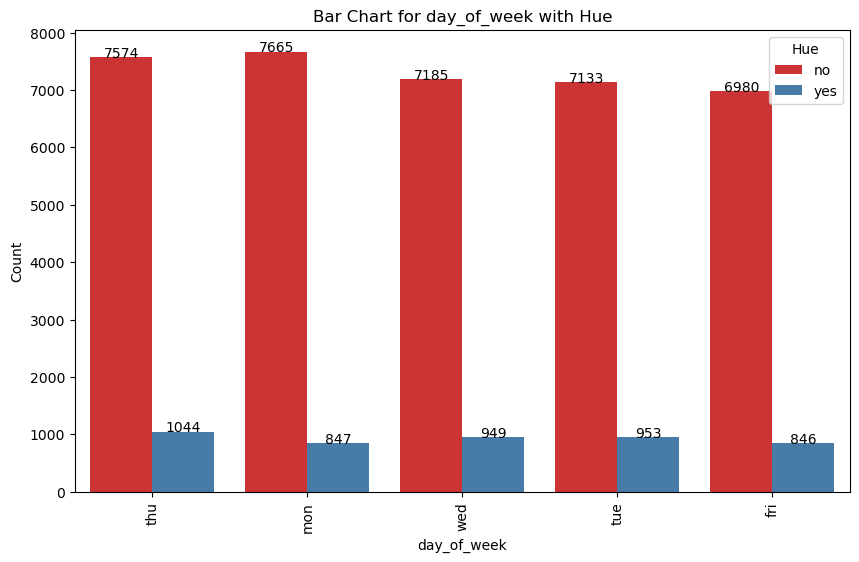

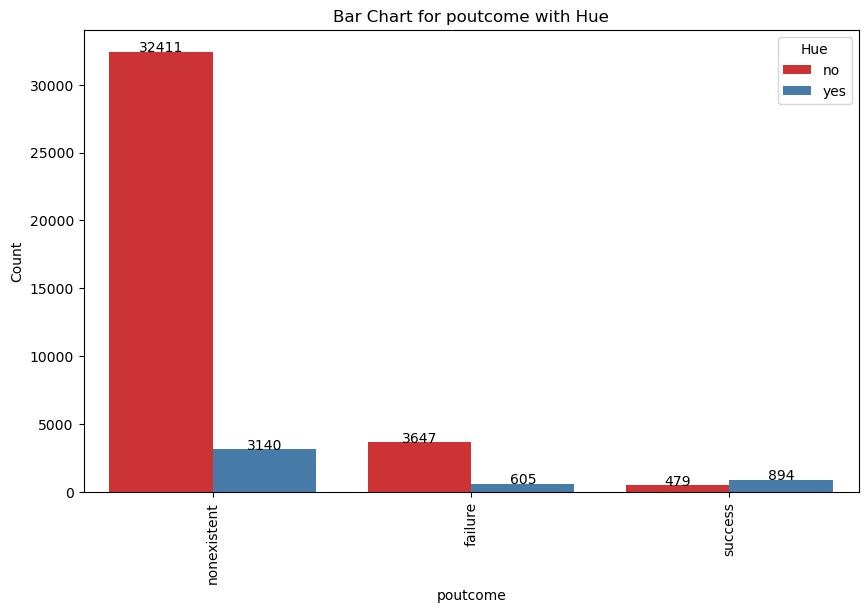

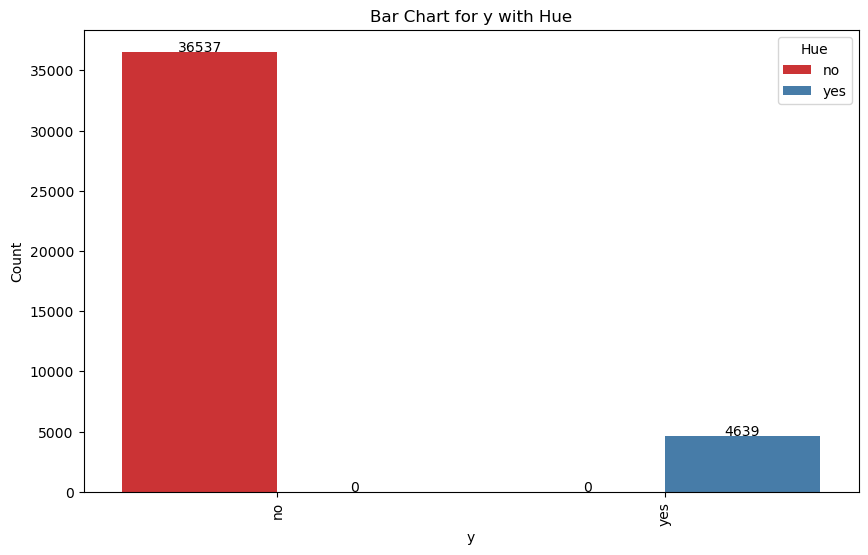

In [13]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
for i in object_columns:
    sorted_order = df[i].value_counts().index 

    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=i, hue='y', palette='Set1', order=sorted_order)
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Bar Chart for {i} with Hue')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

    plt.legend(title='Hue', loc='upper right')  # Add legend
    plt.show()


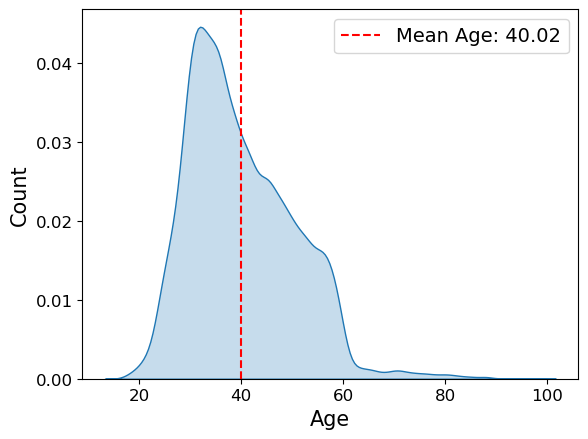

In [14]:
sns.kdeplot(x=df['age'],fill=True)
mean_age = df['age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='upper right')

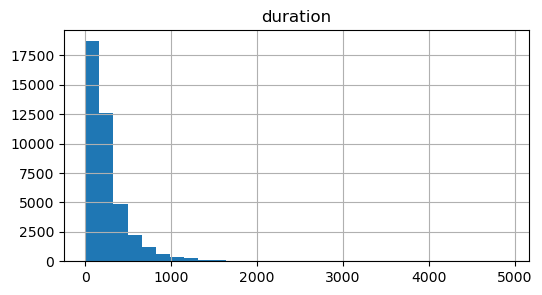

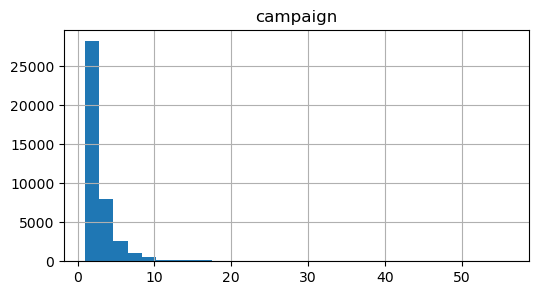

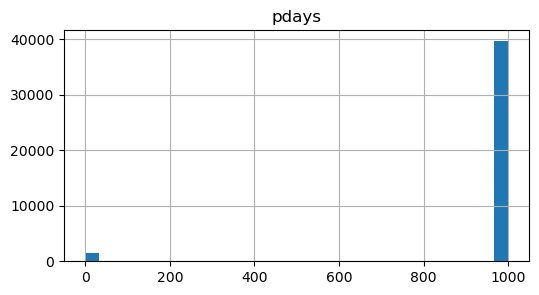

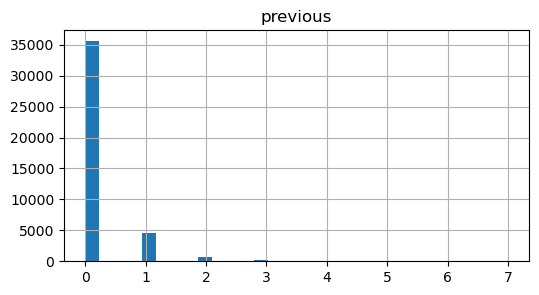

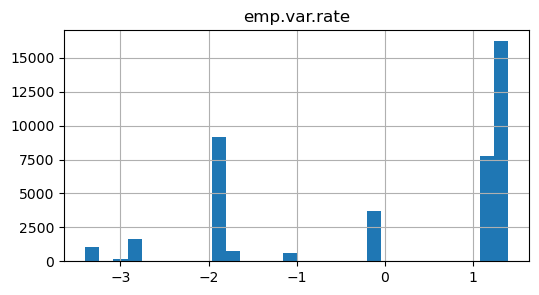

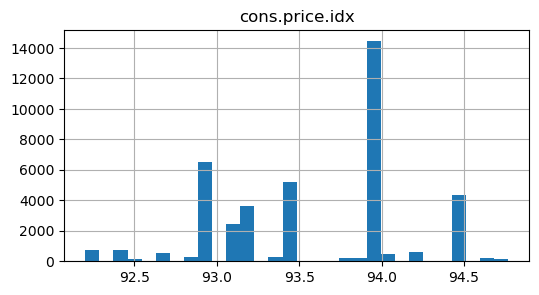

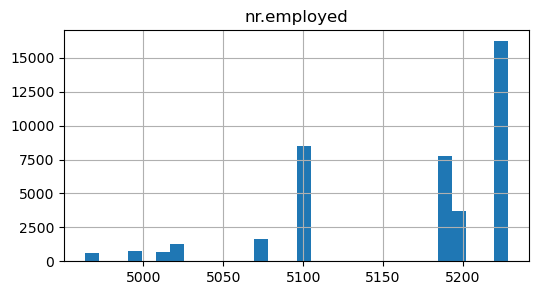

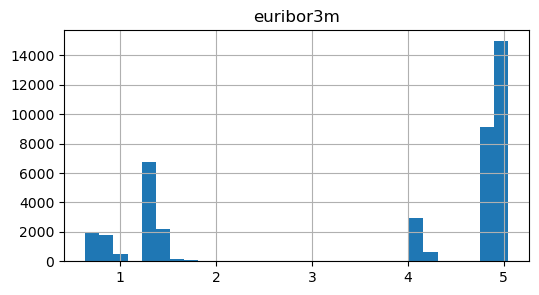

In [15]:
num_list = ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'nr.employed', 'euribor3m']
for i in num_list:
    plt.figure(figsize=(6, 3))
    df[i].hist(bins=30)
    plt.title(f'{i}')

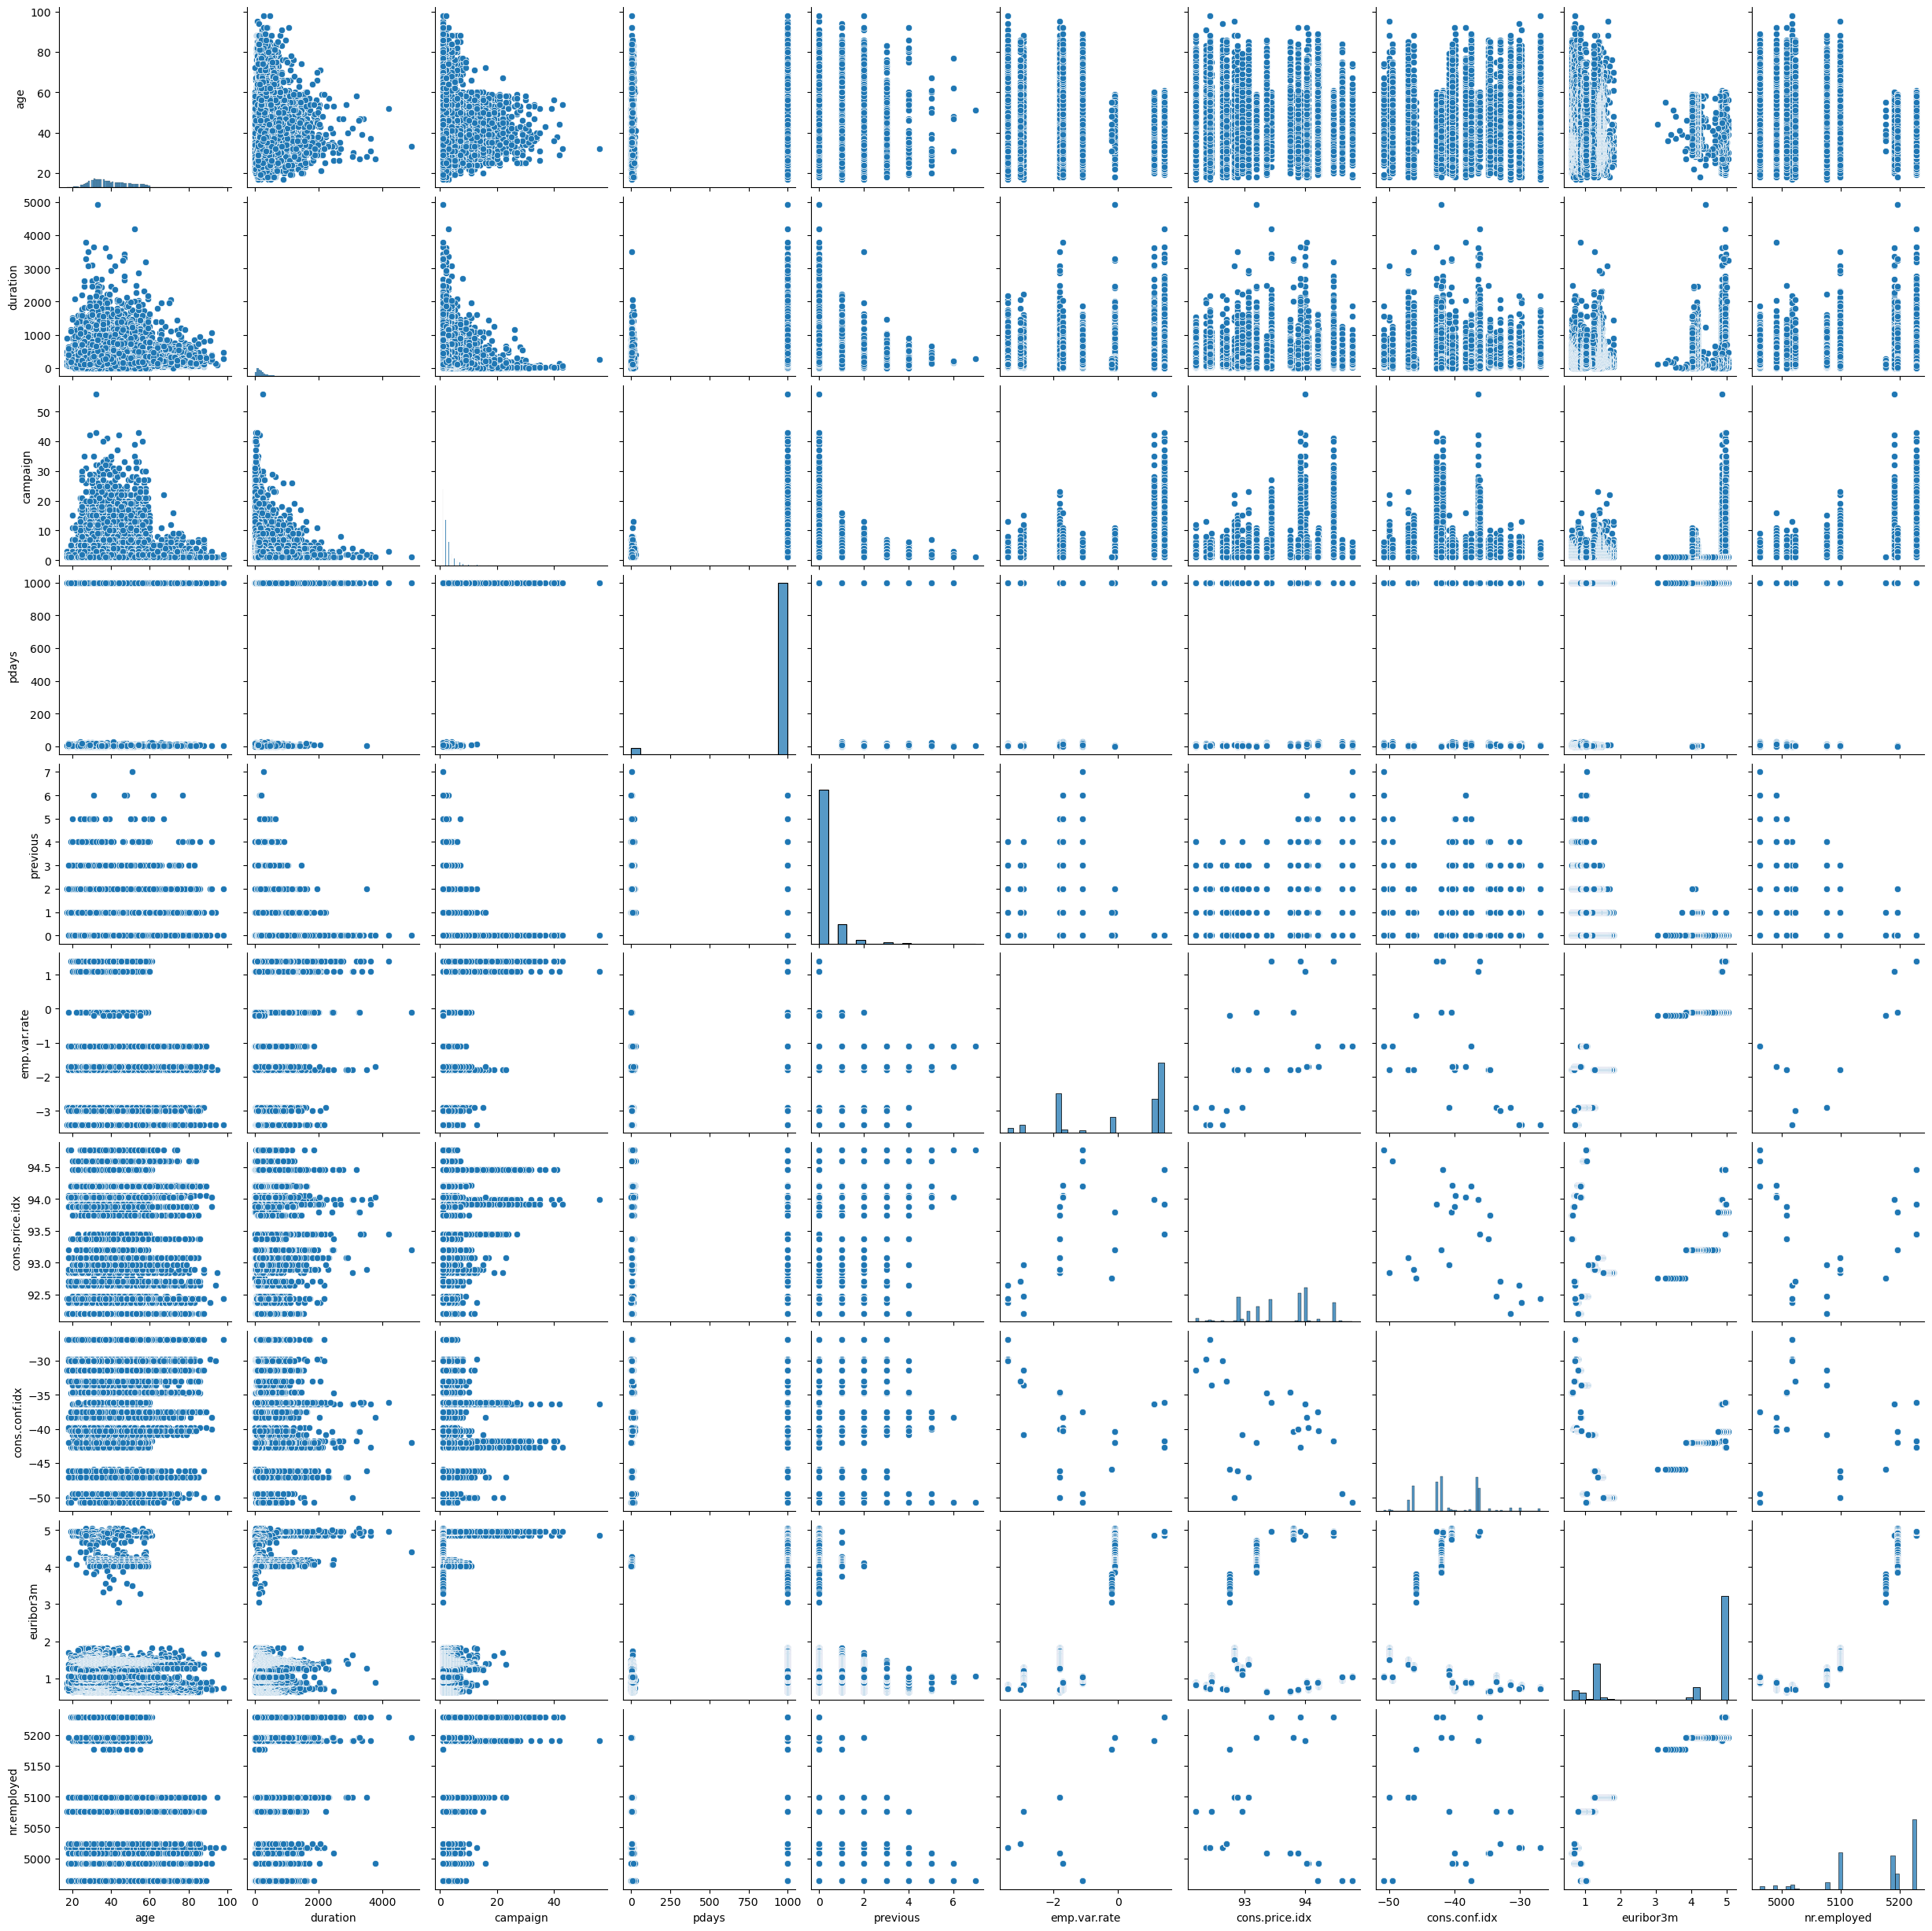

In [16]:
sns.pairplot(df)

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in ['job', 'marital', 'contact', 'education', 'month', 'poutcome', 'default', 'housing', 'loan','y']:
    df[column] = label_encoder.fit_transform(df[column])
# df['job'] = label_encoder.fit_transform(df['job'])
df.drop(['day_of_week'],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int32  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int32  
 5   housing         41176 non-null  int32  
 6   loan            41176 non-null  int32  
 7   contact         41176 non-null  int32  
 8   month           41176 non-null  int32  
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  int32  
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

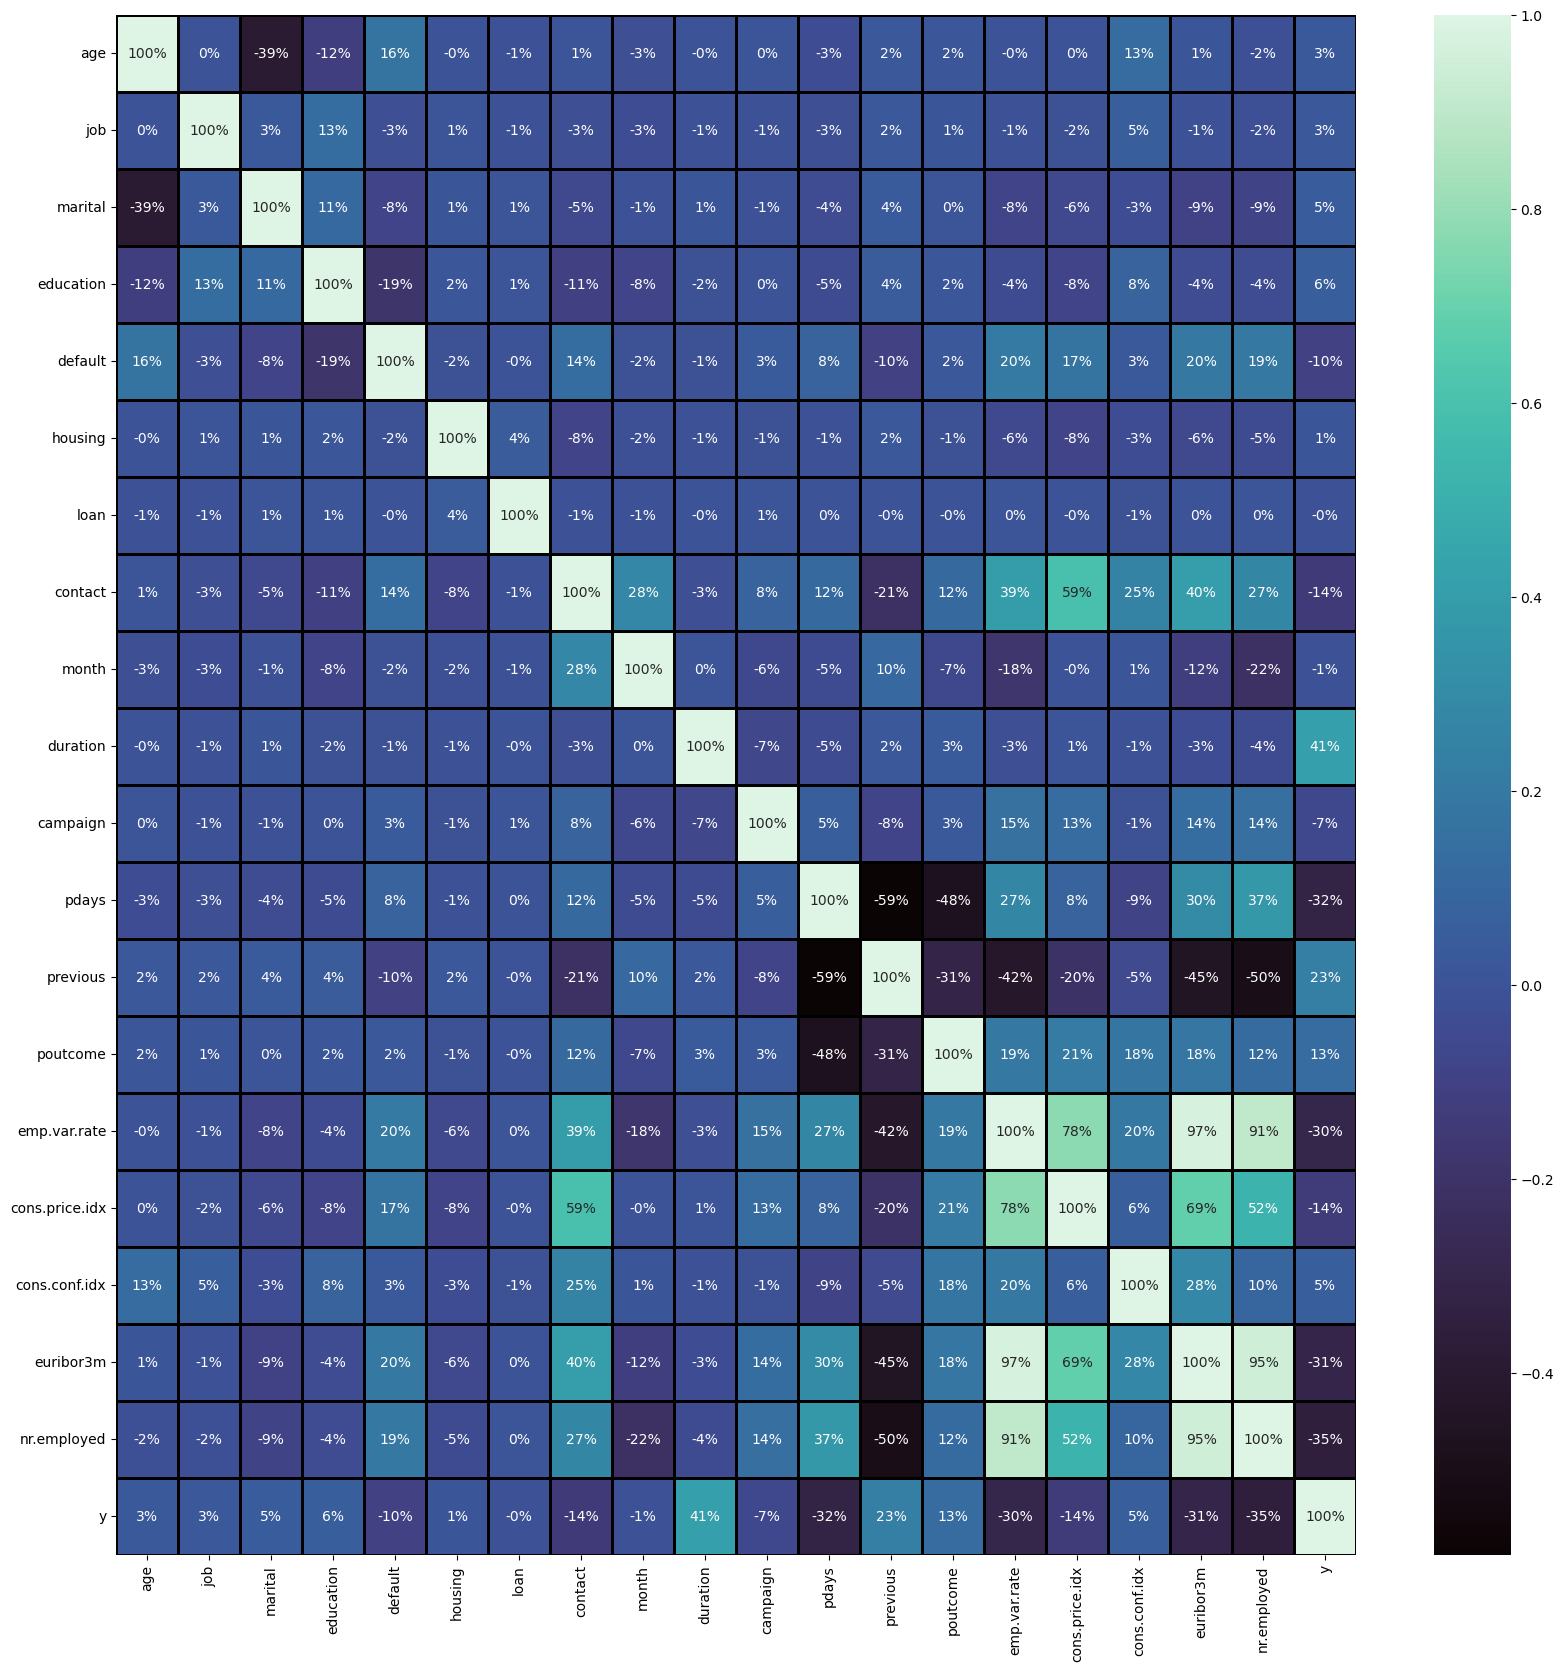

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='mako',linecolor='black',linewidth=1,fmt=".0%")
plt.show()

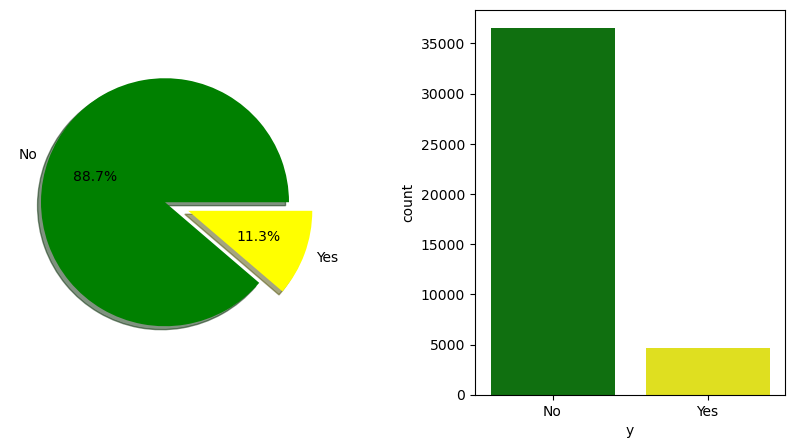

In [20]:
plt.figure(figsize=(10,5))
label_count = df['y'].value_counts().values
label = df['y'].value_counts().index

plt.subplot(1, 2, 1)
explode=(0,0.2)
colors = ['green', 'yellow']
labels = ['No', 'Yes']
plt.pie(x=label_count, labels=labels, autopct='%1.1f%%', shadow=True, radius=1, colors=colors,explode=explode)

plt.subplot(1, 2, 2)
colors = [ 'green','yellow']
sns.countplot(x=df['y'],palette=colors)
plt.xticks([0, 1], ['No','Yes'])
plt.subplots_adjust(wspace=0.5)
plt.show()

In [21]:
x=df.iloc[:,:-1]
x

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [22]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [23]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(x, y)

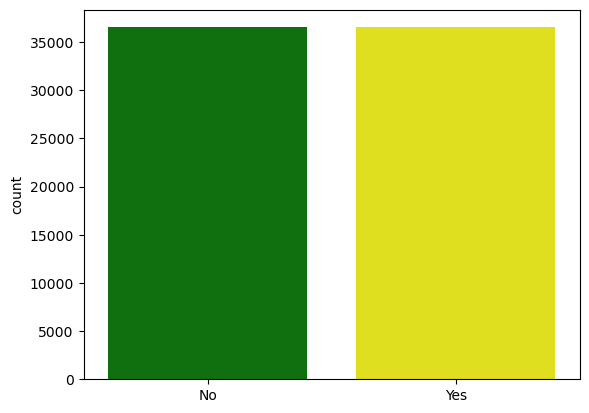

In [24]:
colors = ['green', 'yellow']
sns.countplot(x=y_resample,palette=colors)
plt.xticks([0, 1],['No','Yes'])
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_resample,y_resample,test_size=0.30,random_state=42)

In [26]:
xtrain

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33908,30,1,2,2,0,2,0,0,6,14,6,999,1,0,-1.800000,92.893000,-46.200000,1.281000,5099.100000
65192,47,0,1,0,0,2,0,1,6,940,3,999,0,1,1.100000,93.994000,-36.400000,4.858445,5191.000000
42384,20,7,2,0,0,1,1,0,0,239,1,999,0,0,-1.800000,93.714318,-34.618254,0.643179,5008.700000
28136,42,9,1,2,0,0,2,0,0,437,2,999,0,1,-1.800000,93.075000,-47.100000,1.466000,5099.100000
63285,51,0,0,0,0,2,0,1,6,941,2,999,0,1,1.100000,93.994000,-36.400000,4.858996,5191.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,44,0,1,6,0,2,0,0,1,254,2,999,0,1,-2.900000,92.201000,-31.400000,0.883000,5076.200000
6265,34,1,1,2,0,0,2,1,6,100,2,999,0,1,1.100000,93.994000,-36.400000,4.857000,5191.000000
54886,30,4,1,5,0,1,1,0,6,1220,2,999,0,1,0.451309,93.564783,-39.427223,4.405538,5193.594762
860,40,4,1,6,0,2,0,1,6,295,2,999,0,1,1.100000,93.994000,-36.400000,4.856000,5191.000000


In [27]:
xtest

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
4293,53,1,1,0,1,0,0,1,6,182,2,999,0,1,1.100000,93.994000,-36.400000,4.856000,5191.000000
28313,35,0,1,3,0,2,0,0,0,1190,1,999,0,1,-1.800000,93.075000,-47.100000,1.445000,5099.100000
42943,32,5,1,4,0,0,0,1,4,983,2,999,0,1,1.400000,94.465000,-41.800000,4.865212,5228.100000
71581,40,1,0,4,0,1,1,0,3,430,1,999,0,1,1.400000,93.918000,-42.700000,4.961621,5228.100000
67128,59,0,1,4,0,2,0,0,4,765,1,4,1,2,-1.765232,93.928499,-39.408951,0.757793,5002.754745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,35,9,1,5,0,2,0,1,4,589,6,999,0,1,1.400000,94.465000,-41.800000,4.864000,5228.100000
3219,45,0,1,1,1,2,0,1,6,124,1,999,0,1,1.100000,93.994000,-36.400000,4.860000,5191.000000
66571,36,1,0,3,0,2,0,0,3,812,2,999,0,1,1.400000,93.918000,-42.700000,4.967677,5228.100000
69957,67,5,1,0,0,2,0,0,1,265,1,999,0,1,-2.900000,92.319454,-32.861248,0.914580,5076.200000


In [28]:
ytrain

array([0, 1, 1, ..., 1, 0, 0])

In [29]:
ytest

array([1, 1, 1, ..., 1, 1, 0])

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [31]:
xtrain

array([[-0.87309781, -0.7714112 ,  1.48649342, ..., -1.14807156,
        -0.89746396, -0.42677908],
       [ 0.60266604, -1.06689382, -0.16839765, ...,  0.72769868,
         0.99704464,  0.63266387],
       [-1.74119419,  1.00148455,  1.48649342, ...,  1.06873402,
        -1.23523523, -1.46892972],
       ...,
       [-0.87309781,  0.11503668, -0.16839765, ...,  0.14827271,
         0.75719869,  0.66257685],
       [-0.00500143,  0.11503668, -0.16839765, ...,  0.72769868,
         0.99574982,  0.63266387],
       [-1.82800383,  1.29696717,  1.48649342, ..., -0.47815362,
         1.05082513,  1.06036065]])

In [32]:
xtest

array([[ 1.12352387, -0.7714112 , -0.16839765, ...,  0.72769868,
         0.99574982,  0.63266387],
       [-0.43904962, -1.06689382, -0.16839765, ..., -1.32033617,
        -0.81061443, -0.42677908],
       [-0.69947853,  0.4105193 , -0.16839765, ..., -0.305889  ,
         1.00062839,  1.06036065],
       ...,
       [-0.35223998, -0.7714112 , -1.82328872, ..., -0.47815362,
         1.05489041,  1.06036065],
       [ 2.3388588 ,  0.4105193 , -0.16839765, ...,  1.40503395,
        -1.09150919, -0.69077521],
       [-0.69947853, -1.06689382, -0.16839765, ...,  0.72769868,
         0.99680896,  0.63266387]])

In [35]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
ypred=decision_tree.predict(xtest)
ypred

array([0, 0, 1, ..., 1, 1, 0])

In [36]:
from sklearn.metrics import accuracy_score,classification_report
accuracy = accuracy_score(ytest, ypred)
print("Decision Tree:", accuracy)

print(classification_report(ytest,ypred))

Decision Tree: 0.92345938055923
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11029
           1       0.92      0.93      0.92     10894

    accuracy                           0.92     21923
   macro avg       0.92      0.92      0.92     21923
weighted avg       0.92      0.92      0.92     21923

